In [4]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [5]:
executable_path = {"executable_path": ChromeDriverManager().install()}
browser = Browser("chrome", **executable_path, headless=True)

In [8]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)
html = browser.html
mars_soup = soup(html,"html.parser")


In [11]:
import pandas as pd
df = pd.read_html(url)

In [16]:
data = df[0]

In [19]:
data


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [20]:
data.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [24]:
data["terrestrial_date"] = pd.to_datetime(data["terrestrial_date"])

In [26]:
data.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [27]:
# How many months exist on Mars?
data["month"].max()

12

In [29]:
# How many Martian days worth of data exist in thee scraped dataset?
martian_days = data["sol"].max()-data["sol"].min()
martian_days

1967

In [53]:
# What are the coldest and warmest months on Mars. 
average = data.groupby(by = ["month"])["min_temp"].mean()

<AxesSubplot:xlabel='month'>

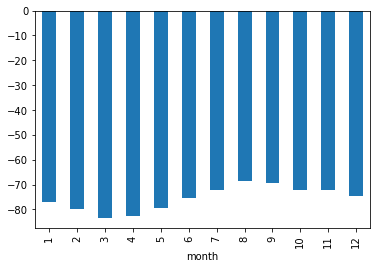

In [56]:
average.plot(kind = "bar")

In [60]:
# Which months have the lowest and the highest atmospheric pressure on Mars?
pressure = data.groupby(by = ["month"])["pressure"].mean()
pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<AxesSubplot:xlabel='month'>

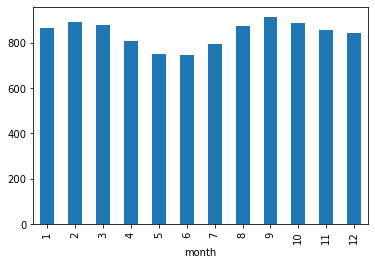

In [61]:
pressure.plot(kind = "bar")

In [73]:
#About how many terrestrial days exist in a Martian Year?
year = data["terrestrial_date"].loc[(data["terrestrial_date"] >= "2013-01-01")&
                             (data["terrestrial_date"] <= "2013-12-31")]

In [74]:
year.count()

290

In [75]:
data.to_csv("mars_csv")